# Implementing a simple two layers neural network
In this exercise we will develop a two neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.


In [ ]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import copy

from first_nn_exc import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read MNIST data:
You can download the data from [here](https://www.kaggle.com/datasets/hojjatk/mnist-dataset). There are many [way](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


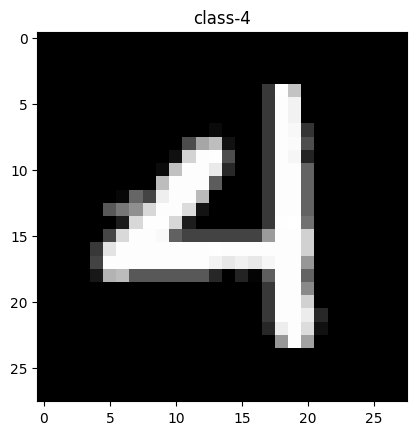

In [33]:
import os

def read_images(filename):
    """Read MNIST images"""
    
    with open(filename, 'rb') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with open(filename, 'rb') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels

# Set the folder where the MNIST dataset files are located
dataset_path = "MNIST"  # Update this with the correct path to your extracted files

# Set the file names based on the extracted files
train_image_filename = os.path.join(dataset_path, 'train-images.idx3-ubyte')
train_label_filename = os.path.join(dataset_path, 'train-labels.idx1-ubyte')

test_image_filename = os.path.join(dataset_path, 't10k-images.idx3-ubyte')
test_label_filename = os.path.join(dataset_path, 't10k-labels.idx1-ubyte')

# Read the images and labels
train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)

# Display the sizes of the train data
print(f'Train data (X) size: {train_images.shape}, and labels (Y) size: {train_labels.shape}')

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

# Display the sizes of the test data
print(f'Test data (X) size: {test_images.shape}, and labels (Y) size: {test_labels.shape}')

# Show a random image from the training set
rand_id = np.random.choice(train_images.shape[0])  # Select a random image index
plt.imshow(train_images[rand_id, :, :], cmap='gray')
plt.title(f'class-{train_labels[rand_id]}')
plt.show()


# CROSS-CHECK: Create a validation data from training data (10%) and transform the data in $\mathbf{R}^d$.

In [34]:
val_data_ration = 0.1
class_ids = list(set(train_labels))
val_ids = []
for cl in class_ids:
    temp_val_index = np.where(train_labels==cl)
    val_ids.extend(list(np.random.permutation(temp_val_index[0])[:round(temp_val_index[0].shape[0]*val_data_ration)]))
# print(val_ids)     
val_images = train_images[val_ids, :, :]  
val_labels = train_labels[val_ids]  
print('Val data (X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

train_ids = [i for i in range(train_labels.shape[0]) if i not in val_labels]
revised_train_images = train_images[train_ids, :, :]  
revised_train_labels = train_labels[train_ids]  
 
X_train = revised_train_images.reshape(revised_train_images.shape[0], -1)
Y_train = revised_train_labels.reshape(-1)
X_val = val_images.reshape(val_images.shape[0], -1)
Y_val = val_labels.reshape(-1)
X_test = test_images.reshape(test_images.shape[0], -1)
Y_test = test_labels.reshape(-1)

print('After reshape\n')
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Val data (X) size: {}, and labels (Y) size: {}' .format(X_val.shape, Y_val.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))



                        
                        

Val data (X) size: (5999, 28, 28), and labels (Y) size: (5999,)
After reshape

Train data (X) size: (59990, 784), and labels (Y) size: (59990,)
Val data (X) size: (5999, 784), and labels (Y) size: (5999,)
Test data (X) size: (10000, 784), and labels (Y) size: (10000,)


# Train a network
To train our network we will use Stochastic Gradient Decent (SGD).

In [35]:
data_dimension = X_train.shape[1]
num_hidden_nodes = 50
num_classes = 10
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )





Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.307733: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 137.43it/s]


epoch: 1 / (30), loss: 1.733114, train acc: 78.41, val acc: 78.38
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.957537: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 154.39it/s]


epoch: 2 / (30), loss: 1.088060, train acc: 86.93, val acc: 86.56
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.673448: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 143.40it/s]


epoch: 3 / (30), loss: 0.804750, train acc: 89.11, val acc: 88.90
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.644568: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 162.96it/s]


epoch: 4 / (30), loss: 0.646630, train acc: 90.22, val acc: 90.15
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.455657: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 160.17it/s]


epoch: 5 / (30), loss: 0.548677, train acc: 91.14, val acc: 91.17
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.440356: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 142.47it/s]


epoch: 6 / (30), loss: 0.482527, train acc: 91.47, val acc: 91.32
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.548699: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 151.19it/s]


epoch: 7 / (30), loss: 0.435934, train acc: 91.95, val acc: 91.83
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.303736: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 144.25it/s]


epoch: 8 / (30), loss: 0.401291, train acc: 91.97, val acc: 91.68
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.397230: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 152.72it/s]


epoch: 9 / (30), loss: 0.373256, train acc: 92.11, val acc: 91.87
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.368311: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 144.29it/s]


epoch: 10 / (30), loss: 0.351729, train acc: 92.57, val acc: 92.22
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.314698: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 159.09it/s]


epoch: 11 / (30), loss: 0.335696, train acc: 92.61, val acc: 92.32
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.345764: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 162.70it/s]


epoch: 12 / (30), loss: 0.321499, train acc: 92.98, val acc: 92.97
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.247204: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 155.51it/s]


epoch: 13 / (30), loss: 0.307322, train acc: 93.02, val acc: 92.65
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.332257: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 141.91it/s]


epoch: 14 / (30), loss: 0.297737, train acc: 93.43, val acc: 93.10
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.263133: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 157.13it/s]


epoch: 15 / (30), loss: 0.286861, train acc: 93.54, val acc: 93.30
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.249097: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 138.65it/s]


epoch: 16 / (30), loss: 0.277013, train acc: 93.43, val acc: 93.22
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.207387: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 127.96it/s]


epoch: 17 / (30), loss: 0.270592, train acc: 93.69, val acc: 93.48
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.249354: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 159.87it/s]


epoch: 18 / (30), loss: 0.264541, train acc: 93.78, val acc: 93.43
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.231182: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 143.91it/s]


epoch: 19 / (30), loss: 0.258110, train acc: 93.76, val acc: 93.58
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.280066: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 157.57it/s]


epoch: 20 / (30), loss: 0.252707, train acc: 93.95, val acc: 93.88
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.254214: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 164.10it/s]


epoch: 21 / (30), loss: 0.246603, train acc: 94.15, val acc: 94.05
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.254532: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 158.98it/s]


epoch: 22 / (30), loss: 0.241484, train acc: 94.01, val acc: 94.12
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.214977: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 159.55it/s]


epoch: 23 / (30), loss: 0.237223, train acc: 94.26, val acc: 94.27
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.286953: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 166.63it/s]


epoch: 24 / (30), loss: 0.232413, train acc: 94.21, val acc: 94.30
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.255306: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 156.90it/s]


epoch: 25 / (30), loss: 0.229091, train acc: 94.31, val acc: 94.27
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.278743: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 157.24it/s]


epoch: 26 / (30), loss: 0.223783, train acc: 93.99, val acc: 93.70
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.238700: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 148.20it/s]


epoch: 27 / (30), loss: 0.221152, train acc: 94.57, val acc: 94.32
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.197868: 100%|███████████████████████████████████████| 300/300 [00:01<00:00, 153.73it/s]


epoch: 28 / (30), loss: 0.218276, train acc: 94.76, val acc: 94.77
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.172829: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 143.82it/s]


epoch: 29 / (30), loss: 0.212765, train acc: 94.72, val acc: 94.52
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.189212: 100%|███████████████████████████████████████| 300/300 [00:02<00:00, 148.74it/s]


epoch: 30 / (30), loss: 0.209742, train acc: 94.84, val acc: 94.65


In [36]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 94.76
Validation accuracy: 94.77
Test accuracy: 93.84


# Plot the loss.

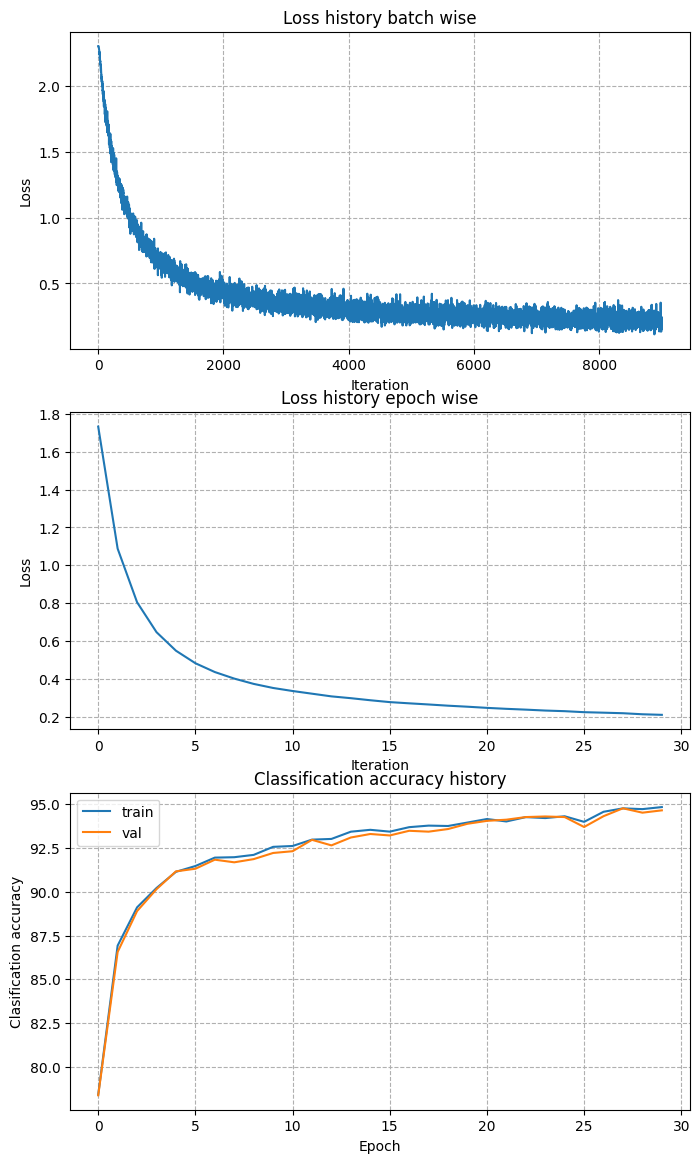

In [43]:
# Plot the loss function and train / validation accuracies
plt.figure(figsize=(8, 14))
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# TODO: Tune your hyperparameters:
    - Learning rate:
    - Number of nodes in hidden layer:


In [30]:
best_net = None  # Store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#################################################################################
results = {}
best_val = 0
best_net = None
learning_rates = [1e-3, 5e-3, 7e-3, 1e-2, 5e-2, 1e-1]
num_hidden_nodes = [30, 50, 60, 70, 100]
num_classes = 10
num_iters = 5000
num_epoch = 30
batch_size = 256

for lr in learning_rates:
    for hidden_nodes in num_hidden_nodes:
      
        net = FirstNN(input_dims=784, num_nodes_lr1=hidden_nodes, num_classes=num_classes, param_init='small_std', std=1e-4)
        
     
        net.learning_rate = lr  
        net.train(X_train, Y_train, X_val, Y_val, num_iters=num_iters, batch_size=batch_size, num_epoch=num_epoch, 
                  learning_rate = lr )

       
        Y_val_pred = net.predict(X_val, best_param=True)
        val_accuracy = 100*(Y_val_pred == Y_val).mean()

        if val_accuracy > best_val:
            best_val = val_accuracy
            best_net = net
            best_params = {'lr': lr, 'hidden_nodes': hidden_nodes}

print('Best validation accuracy achieved during cross-validation: {:.2f} for #hdnn: {}, lr: {}'.format(
    best_val, best_net.best_params['W1'].shape[1], best_net.learning_rate))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################


C:\Users\radhe\Desktop\RKMVERI_Data_Science\2nd_Sem\DL_&_NLP\first_nn_exc.py:28: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


Best validation accuracy achieved during cross-validation: 96.57 for #hdnn: 100, lr: 0.007


# Test on best model

In [31]:
# Predict on the train set
Y_train_pred = best_net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = best_net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = best_net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 96.79
Validation accuracy: 96.57
Test accuracy: 94.86
